`MACHINE LEARNING`

NAMA  : Jason Hendrawan

NIM  : 2501963040

KELAS : LA01




## a. [LO 1 & LO 2, 5 poin] Pisahkan variable pada dataset menjadi variable bebas dan variable terikat. Variable terikat pada dataset ini adalah “activity” dan sisanya adalah variable bebas.

***`code:`***

pada code bagian ini kita pertama akan load dataset nya dengan nama df menggunakan pandas


kemudian kita pisahkan dataset ke **variabel bebas(sisanya)** dan **terikat(activity)**

terus saya print untuk menunjukan valuenya

In [13]:
import pandas as pd

df = pd.read_csv("malaria.csv", index_col=0)

bebas = df.iloc[:, :-1].values
terikat = df.iloc[:, -1].values

print(bebas)
print("=================================================================")
print(terikat)

[[ 0.07635996 -0.01796325 -0.04107881 ...  0.0371548  -0.05588296
  -0.0017388 ]
 [ 0.08790572 -0.02127821 -0.05573199 ...  0.02955202 -0.06631258
  -0.00779694]
 [ 0.08390451 -0.02795817 -0.05810402 ...  0.02990121 -0.07291201
   0.0031679 ]
 ...
 [ 0.07147044 -0.02981772 -0.04289912 ...  0.02958624 -0.05262243
  -0.00079927]
 [ 0.07875429 -0.03335106 -0.05802662 ...  0.02866316 -0.07341927
  -0.00396983]
 [ 0.08334859 -0.02221397 -0.05621962 ...  0.04489618 -0.06945174
  -0.01205118]]
[ 0.73859844 -1.09008506 -0.35868213 ... -0.54958064 -0.39887973
 -0.13547922]


##b. [LO 1 & LO 2, 15 poin] Buatlah Statistical Analysis dan Visualization untuk dataset yang diberikan. Periksa hubungan antara setiap variable bebas dan jelaskan hubungan antar setiap independent variable, serta cari korelasi antara variable bebas dan variable terikatnya.

***`Code:`***

pada bagian ini kita melakukan statistical analysis dan visualisasi dengan menggunakan seaborn dan matplotlib.

pertama kita compute correlation matrix dengan corr().

kita kemudian buat scatter plot untuk 5 variabel pertama dengan variabel lainnya. pairplot ini kita lakukan dengan sns.pairplot()

kemudian kita buat heatmap dengan menggunakan sns.heatmap()


kemudian kita hitung korelasi antara variabel bebas dan terikat

***`output:`***

scatter plot yang dihasilkan dari pairplot adalah scatter plot dari setiap variabel terhadap variabel lainnya, ini membantu kita untuk memvisualisasikan hubungan antara setiap pasangan variabel bebas


selanjutnya untuk heatmap, heatmap membantu kita memvisualisasi korelasi antara semua variabel dengan menggunakan corr(). warna yang semakin gelap menandakan nilai korelasi yang lebih tinggi.


untuk nilai korelasinya, jika nilainya mendekati -1 berarti ada hubungan negatif yang kuat diantara kedua variabel tersebut. jika mendekati 0 berarti tidak ada hubungan, dan jika mendekati 1 berarti ada hubungan positif yang kuat.

<Figure size 500x400 with 0 Axes>

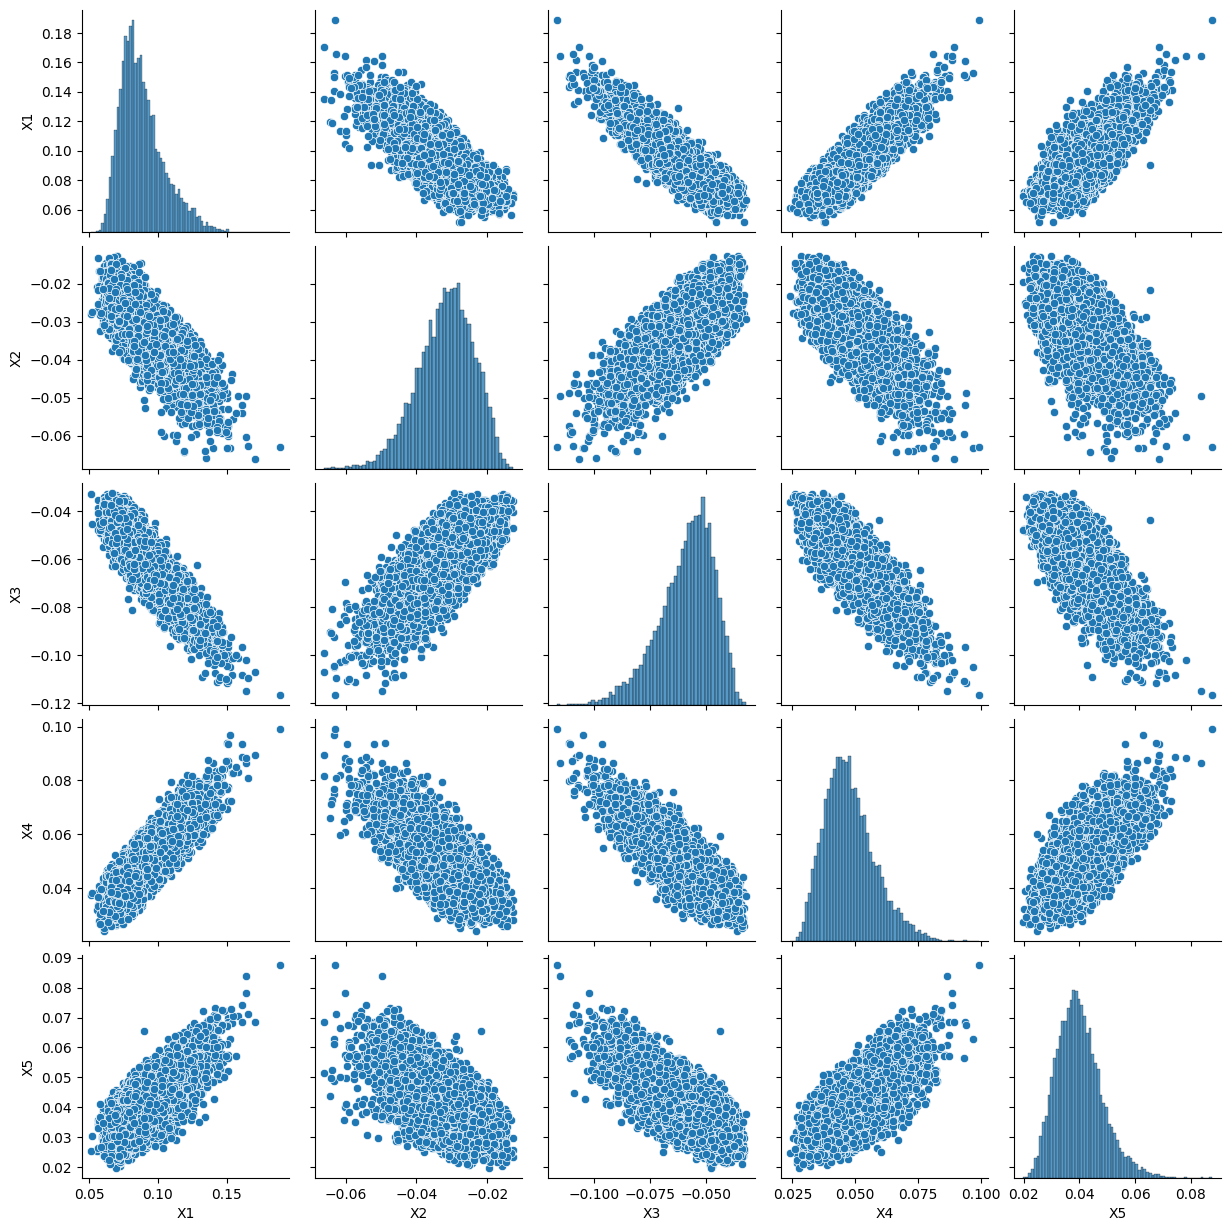

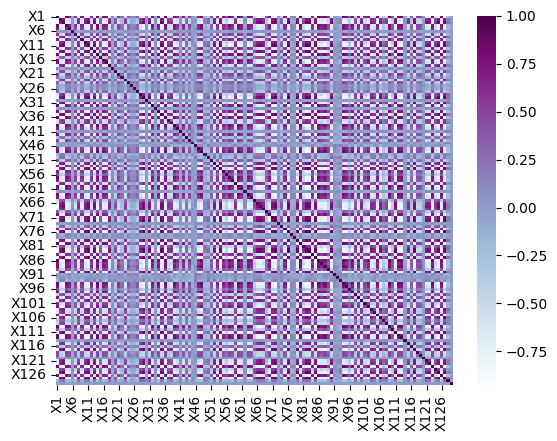

X1         -0.032858
X2          0.035124
X3          0.037761
X4         -0.021703
X5         -0.054241
              ...   
X125        0.029905
X126       -0.016220
X127        0.031813
X128       -0.017019
activity    1.000000
Name: activity, Length: 129, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df.corr()
plt.figure(figsize=(5, 4))
sns.pairplot(df.iloc[:,0:5])
plt.show()
print("==============================================================================")

sns.heatmap(cor, cmap="BuPu")
plt.show()
print("==============================================================================")
correlation = cor['activity']
print(correlation)

## c. [LO 1 & LO 2, 20 poin] Lakukan beberapa pre-processing step yang dibutuhkan pada dataset yang diberikan. Berikan alasan kalian menggunakan data pre-processing tersebut.

***`code:`***

pada bagian ini kita lakukan pre processing dengan standard scaler dari sci kit learn

standard scaler ini berguna untuk membuat variabel bebas untuk memiliki mean 0 dan standar deviasi 1

hal ini dilakukan untuk memastikan agar semua variabel berada di skala yang serupa

***`output:`***

saya print hasil dari pre processing agar menunjukan bahwa proses pre processing itu sudah berhasil 

In [15]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
bebas = scaler.fit_transform(bebas)

print(bebas)

[[-7.52978235e-01  1.74556380e+00  1.41701388e+00 ... -2.72227542e-01
   1.17834817e+00  9.65289569e-01]
 [-4.78775893e-02  1.32637379e+00  2.46020608e-01 ... -1.04428819e+00
   4.77283628e-01 -1.31339578e-01]
 [-2.92231859e-01  4.81664096e-01  5.64626760e-02 ... -1.00882836e+00
   3.36787913e-02  1.85348819e+00]
 ...
 [-1.05158168e+00  2.46516621e-01  1.27154575e+00 ... -1.04081296e+00
   1.39751646e+00  1.13536150e+00]
 [-6.06756277e-01 -2.00289468e-01  6.26476949e-02 ... -1.13455104e+00
  -4.18183863e-04  5.61434655e-01]
 [-3.26181946e-01  1.20804253e+00  2.07052176e-01 ...  5.13907183e-01
   2.66273661e-01 -9.01432256e-01]]


## d. [LO 1 & LO 2, 5 poin] Pisahkan dataset menjadi dataset train, dan test dengan proporsi dataset yaitu 75% dataset untuk data train dan sisanya untuk data test

***`code:`***

pada code ini kita pisahkan dataset jadi train dan test dengan ratio 75:25 dengan menggunakan train_test_split() dari scikit-learn

In [16]:
from sklearn.model_selection import train_test_split

bebas_train, bebas_test, terikat_train, terikat_test = train_test_split(bebas, terikat, test_size=0.25, random_state=42)

## e. [LO 1 & LO 2, 10 poin] Buatlah sebuah model linear regression dari dataset yang telah mengalami pre-processing. Beberapa ketentuan yang perlu diperhatikan: 
i. Lakukan prediksi dengan menggunakan test-set 

ii. Tampilkan hasil prediksi dengan nilai sebenarnya

***`code: `***

pada bagian ini kita akan buat linear regression model dengan menggunakan scikit

pertama kita fit modelnya ke training data kita

kemudian kita gunakan function predict untuk prediksi activity values untuk test dataset

setelah itu kita tampilkan hasil prediksi dan value aslinya dengan menggunakan dataframe.

***`output:`***

outputnya berupa actual value dan predicted value

In [17]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(bebas_train, terikat_train)


terikat_pred = regressor.predict(bebas_test)


df_pred = pd.DataFrame({'Actual': terikat_test, 'Predicted': terikat_pred})
print(df_pred)


        Actual  Predicted
0    -0.184393  -0.471071
1     2.005526  -0.448272
2    -0.323273  -0.490843
3    -0.179924  -0.095841
4     0.223144  -0.008642
...        ...        ...
2495 -2.174185  -0.390185
2496 -0.189820   0.079178
2497 -0.005013  -0.767750
2498  0.060427  -0.546680
2499 -1.006237  -0.503831

[2500 rows x 2 columns]


## f. [LO 1 & LO 2, 15 poin] Buatlah evaluasi terhadap permodelan Linear Regression:
i. Tampilkan regression model

ii. Buatlah evaluasi terhadap hasil nilai prediksi dengan menggunakan beberapa
evaluation metric seperti RMSE, MSE, MAE dan R2

iii. Jelaskan hasil dari evaluation metric yang dilakukan

`*i. Tampilkan regression model*`

***`code:`***

pertama kita fit model kita ke variabel 

kemudian kita buat model LR dengan menggunakan ordinary least squares(OLS) dari statsmodel. setelah itu kita fit ols model ke training data untuk mendapatkan coeffisien dan data" lainnya

kemudian kita tampilkan model kita dengan .summary()


***`output:`***

output berupa model summary, yang berisikan coefficient estimates, standard errors, t-statistics, p-values, dan R-squared value dari modelnya

In [18]:
import statsmodels.api as sm

b_sm = sm.add_constant(bebas_train)
lr_model = sm.OLS(terikat_train, b_sm).fit()

print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.502
Date:                Fri, 05 May 2023   Prob (F-statistic):           6.35e-18
Time:                        21:24:34   Log-Likelihood:                -11965.
No. Observations:                7499   AIC:                         2.419e+04
Df Residuals:                    7370   BIC:                         2.508e+04
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3429      0.014    -24.608      0.0

`*ii. Buatlah evaluasi terhadap hasil nilai prediksi dengan menggunakan beberapa evaluation metric seperti RMSE, MSE, MAE dan R2*`

***`code:`***

pertama kita membuat prediksi dari test data dengan model yang sudah kita buat sebelumnya

kemudian kita menghitung evaluation metric kita dengan library scikit

***`output:`***

output dari code ini adalah hasil dari perhitungan untuk semua evaluation metric yang sudah dihitung

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


terikat_pred = lr_model.predict(sm.add_constant(bebas_test))

mse = mean_squared_error(terikat_test, terikat_pred)
mae = mean_absolute_error(terikat_test, terikat_pred)
rmse = np.sqrt(mse)
r2 = r2_score(terikat_test, terikat_pred)

print("RMSE: ", rmse)
print("MSE: ", mse)
print("MAE: ", mae)
print("R2: ", r2)


RMSE:  1.2059216390061538
MSE:  1.454246999423288
MAE:  0.8004561883426208
R2:  -0.002339481440764457


***`iii. Jelaskan hasil dari evaluation metric yang dilakukan`***

jadi setelah evaluation metric sudah dihitung kita ambil kesimpulan bahwa performa model ini kurang baik dalam memprediksi variabel terikat dari variabel bebas. karena nilai MAE dan RMSE yang tinggi, hal ini menunjukan bahwa prediksi memiliki kesalahan yang besar, dan nilai r square yang negatif menunjukan bahwa model tidak menjelaskan variasi dalam variabel terikat dengan baik.


## g. [LO 1 & LO 2, 10 poin] Buat plot yang sesuai untuk menggambarkan hasil dari predicted value vs Actual value

***`code:`***

pada bagian ini kita visualisasi hasil predicted value dan actual value dengan plt.scatter. kemudian kita beri label-label dan kita tambahkan garis diagonal untuk membantu visualisasi


***`output:`***

Diagram ini akan menunjukkan seberapa baik prediksi model dengan nilai sebenarnya, dengan titik-titik yang lebih dekat dengan garis diagonal berarti model yang lebih baik.


jadi bisa dilihat dari hasil perhitungan dan hasil graphic kalau model yang dibuat ini kurang baik untuk menangani dataset ini

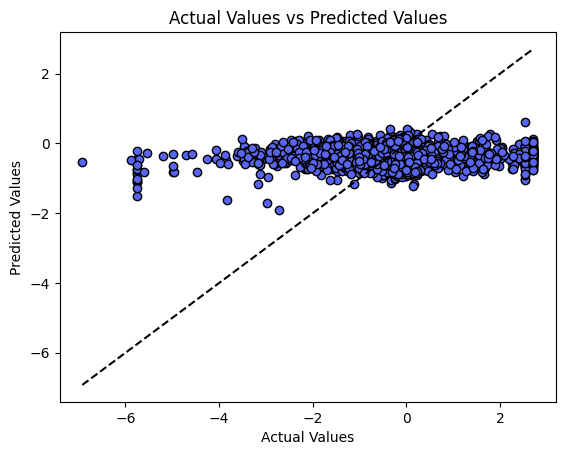

In [20]:
plt.scatter(terikat_test, terikat_pred, edgecolors='black', color='#5865F2')


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values")


plt.plot([terikat_test.min(), terikat_test.max()], [terikat_test.min(), terikat_test.max()], 'k--')

# Show the plot
plt.show()